# Breast Cancer - Data Analysis and Predictions


Breast cancer is one of the leading causes of mortality among women globally, with an estimate of over 2 million new cases diagnosed in the last year. This complex disease manifests through the uncontrolled growth of cells in the breast, which can form malignant tumors capable of metastasizing and spreading to other parts of the body. Thorough research and data analysis on breast cancer are crucial for developing early diagnosis strategies, improving treatments, and ultimately saving lives.

#### Analysis Objectives
- Identify patterns and correlations between different characteristics of tumors and their classification as benign or malignant.
- Assess the effectiveness of various machine learning models in predicting the malignancy of tumors, aiming to optimize the accuracy and sensitivity of the diagnosis.

In [1]:
# Data Manipulation and Analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from xgboost import plot_importance

import joblib

## Data Reading

In [2]:
df = pd.read_csv('breast-cancer.csv')

## Dataset Overview


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.shape

(569, 32)

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Dataset Columns
- `id`: Identifier.
- `diagnosis`: The diagnosis of the tumor, indicated as M (malignant) or B (benign).
- `radius_mean`: The average of distances from the center to points on the perimeter of the tumor.
- `texture_mean`: The average of the grayscale value of the tumor's texture.
- `perimeter_mean`: The average perimeter of the tumor.
- `area_mean`: The average area of the tumor.
- `smoothness_mean`: The average local variation in radius lengths of the tumor.
- `compactness_mean`: The average compactness of the tumor.
- `concavity_mean`: The average of concave portions of the tumor contour.
- `concave points_mean`: The average number of concave points on the tumor contour.
- `symmetry_mean`: The average symmetry of the tumor.
- `fractal_dimension_mean`: The average "fractal dimension" of the tumor contour, which indicates complexity.

In addition to the average measures, the dataset also includes the same characteristics calculated as standard errors (`_se`) and as the worst (largest) values (`_worst`), totaling 30 measured characteristics.

## Data Cleaning

In [7]:
# Remove the 'id' column as it is not necessary for the analysis
df = df.drop(columns=['id'])

### Missing Values

In [8]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Duplicated Rows

In [9]:
df.duplicated().sum()

0

### Data Types

In [10]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

### Outliers


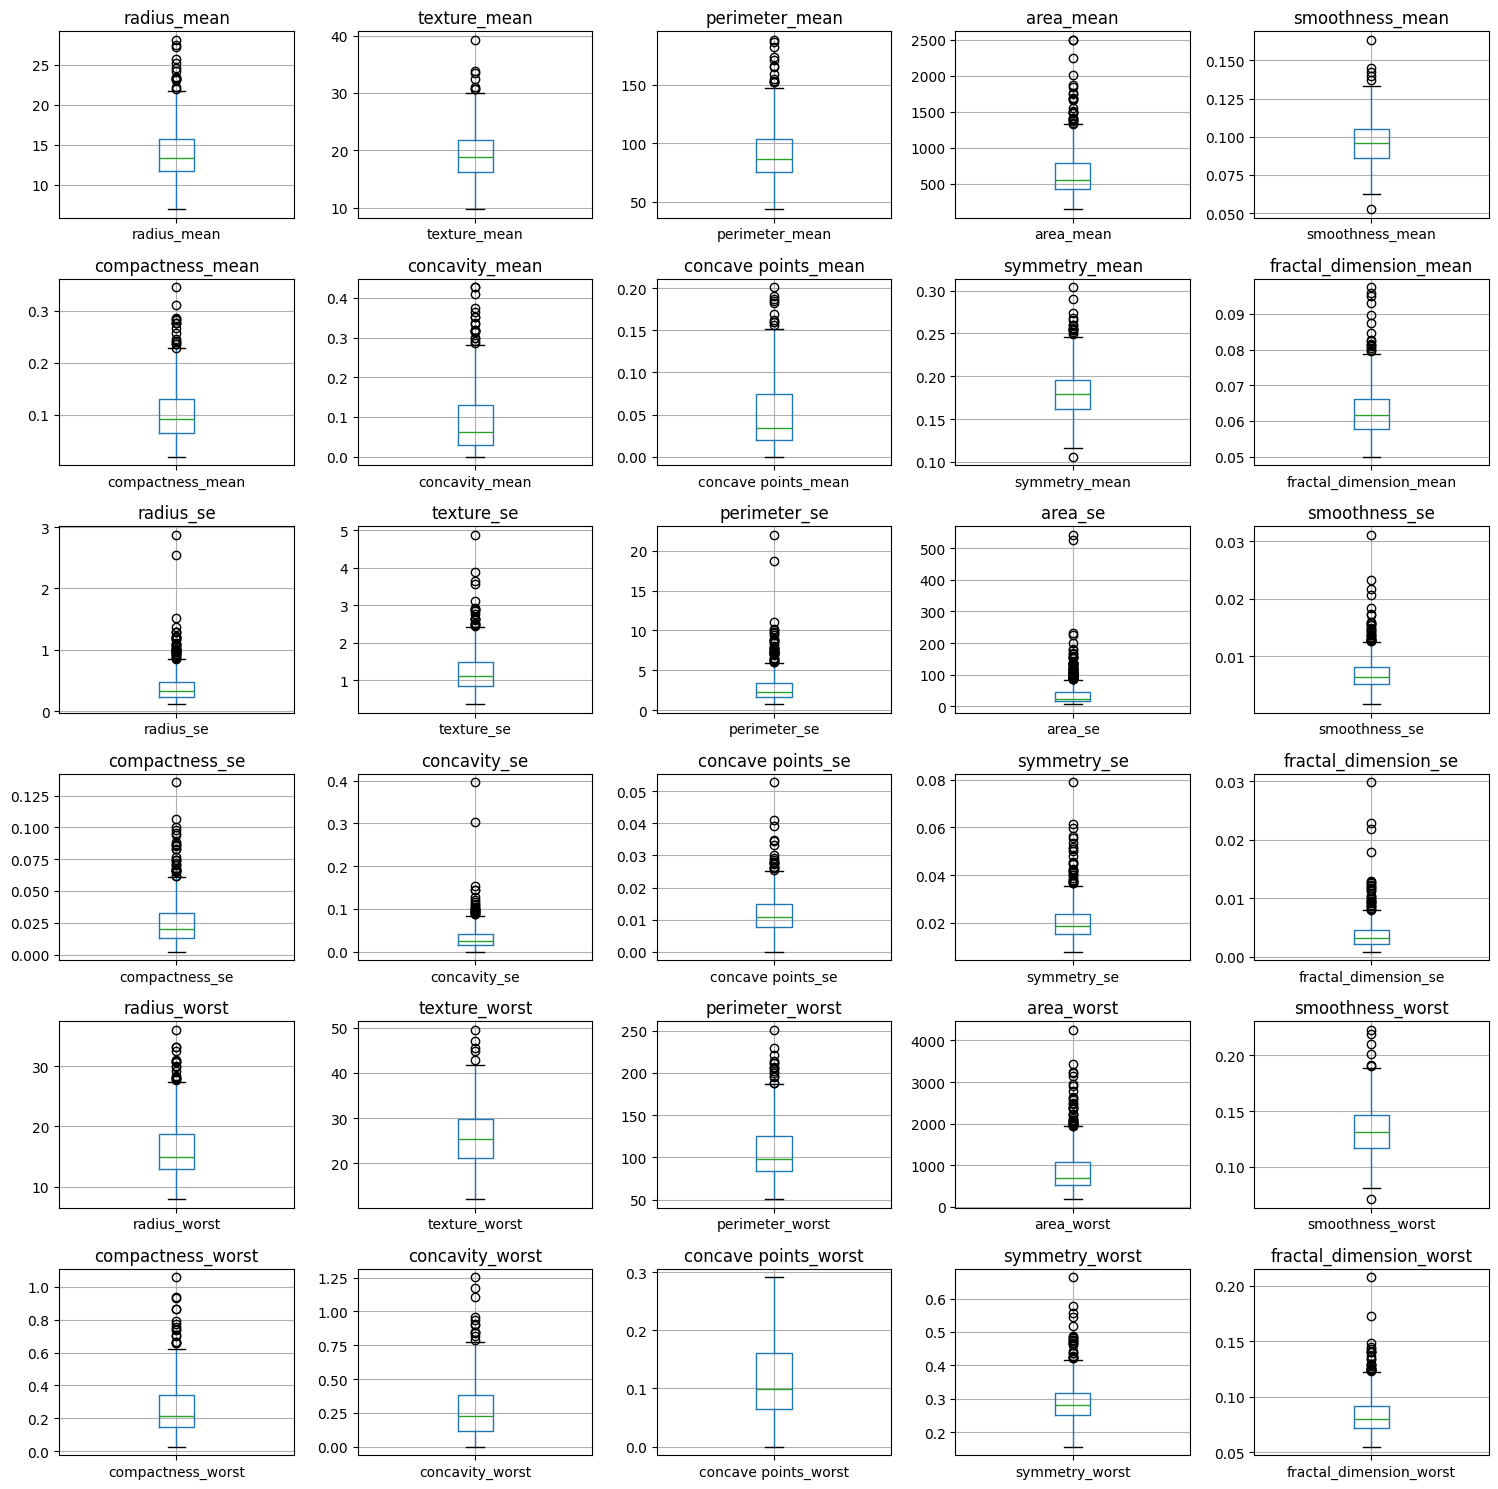

In [11]:
# List of features excluding 'diagnosis'
features = df.drop(columns=['diagnosis']).columns

# Set the size of the plot
plt.figure(figsize=(15, 15))

# Loop through each feature to create a boxplot
for i, feature in enumerate(features, 1):
    plt.subplot(6, 5, i)
    df.boxplot(column=feature)
    plt.title(feature)

plt.tight_layout()
plt.show()

The box plots show the distribution of data for each feature. Outliers are represented as points outside the "whiskers" of the box plots.
Many features show a high number of outliers, indicating that there are tumors with characteristics significantly greater than the average of the sample.

In [12]:
# Removing Outliers Using IQR
# The IQR, or interquartile range, is calculated as the difference between the third quartile (Q3) and the first quartile (Q1) of the data, and outliers are defined as data points that fall outside this range.

# Q1 represents the 25th percentile of the data
# Q1 = df.drop(['diagnosis'], axis=1).quantile(0.25) 

# Q3 represents the 75th percentile of the data
# Q3 = df.drop(['diagnosis'], axis=1).quantile(0.75)

# IQR measures the statistical dispersion of the data
# IQR = Q3 - Q1

# Identifying outliers
# outliers = ((df.drop(['diagnosis'], axis=1) < (Q1 - 1.5 * IQR)) | (df.drop(['diagnosis'], axis=1) > (Q3 + 1.5 * IQR))).any(axis=1)
# Outliers are defined as data points falling outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR]

# Display counts of outliers
# outliers.value_counts()

# Filtering out the outliers
# df = df[~outliers] # Keep it commented

## Exploratory Data Analysis (EDA)

### Distribution of Diagnoses

In [13]:
diagnosis_counts = df['diagnosis'].value_counts().reset_index()
diagnosis_counts.columns = ['Diagnosis', 'Count']

diagnosis_counts

,Diagnosis,Count
0,B,357
1,M,212


In [14]:
fig_diagnosis_pie = px.pie(diagnosis_counts, 
                           names='Diagnosis', 
                           values='Count', 
                           title='Distribution of Diagnoses', 
                           color='Diagnosis')  

fig_diagnosis_pie.show()

In the dataset, there are 212 cases classified as malignant (M) and 357 cases classified as benign (B). This distribution indicates that there are more benign tumors than malignant tumors in the dataset.

### Separate Descriptive Statistics by Diagnosis

In [15]:
# Group the dataset by 'diagnosis' and calculate descriptive statistics for each group
stats_by_diagnosis = df.groupby('diagnosis')[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']].describe()

# Filter to include only count, mean, std, min, and max
stats_by_diagnosis = stats_by_diagnosis.loc[:, (slice(None), ['count', 'mean', 'std', 'min', 'max'])]

stats_by_diagnosis

radius_mean                                     texture_mean  \
                count       mean       std     min    max        count   
diagnosis                                                                
B               357.0  12.146524  1.780512   6.981  17.85        357.0   
M               212.0  17.462830  3.203971  10.950  28.11        212.0   

                                              ... symmetry_worst            \
                mean       std    min    max  ...          count      mean   
diagnosis                                     ...                            
B          17.914762  3.995125   9.71  33.81  ...          357.0  0.270246   
M          21.604906  3.779470  10.38  39.28  ...          212.0  0.323468   

                                    fractal_dimension_worst            \
                std     min     max                   count      mean   
diagnosis                                                               
B          0.041745  0.1566  0.4228                   357.0  0.079442   
M          0.074685  0.1565  0.6638                   212.0  0.091530   

                                      
                std      min     max  
diagnosis                             
B          0.013804  0.05521  0.1486  
M          0.021553  0.05504  0.2075  

[2 rows x 150 columns]

#### Observations for Benign (`B`) Tumors:
- **Count**: There are 357 benign cases in the dataset.
- **Radius Mean**: The average mean radius of benign tumors is smaller (12.146524) compared to malignant ones, with a standard deviation of 1.780512.
- **Texture Mean**: On average, benign tumors tend to have a smoother texture (mean of 17.914762) than malignant tumors.
- **Symmetry Worst**: Benign tumors have a lower average worst-case symmetry (0.270246) indicating less variation in symmetry compared to malignant tumors.
- **Fractal Dimension Worst**: The average worst fractal dimension for benign cases is 0.079442, which is lower than that for malignant cases, indicating less complexity on the tumor edges.

#### Observations for Malignant (`M`) Tumors:
- **Count**: There are 212 malignant cases in the dataset.
- **Radius Mean**: Malignant tumors have a higher average mean radius (17.462830) with greater variability (std of 3.203971), indicating larger and more irregular tumors.
- **Texture Mean**: The mean texture is rougher (21.604906) in malignant tumors, which might be associated with more aggressive tumor properties.
- **Symmetry Worst**: Malignant tumors exhibit more asymmetry (mean of 0.323468) in their worst states, which can be a marker of malignancy.
- **Fractal Dimension Worst**: The higher average worst fractal dimension (0.091530) suggests a more complex tumor border, which can correspond to higher malignancy.

In [16]:
# Filter to include only min, and max
stats_by_diagnosis_min_max = stats_by_diagnosis.loc[:, (slice(None), ['min', 'max'])]

stats_by_diagnosis_min_max

radius_mean        texture_mean        perimeter_mean         \
                  min    max          min    max            min    max   
diagnosis                                                                
B               6.981  17.85         9.71  33.81          43.79  114.6   
M              10.950  28.11        10.38  39.28          71.90  188.5   

          area_mean         smoothness_mean          ... compactness_worst  \
                min     max             min     max  ...               min   
diagnosis                                            ...                     
B             143.5   992.1         0.05263  0.1634  ...           0.02729   
M             361.6  2501.0         0.07371  0.1447  ...           0.05131   

                  concavity_worst        concave points_worst         \
              max             min    max                  min    max   
diagnosis                                                              
B          0.5849         0.00000  1.252              0.00000  0.175   
M          1.0580         0.02398  1.170              0.02899  0.291   

          symmetry_worst         fractal_dimension_worst          
                     min     max                     min     max  
diagnosis                                                         
B                 0.1566  0.4228                 0.05521  0.1486  
M                 0.1565  0.6638                 0.05504  0.2075  

[2 rows x 60 columns]

### Correlation Matrix

In [17]:
correlation_matrix = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']].corr()

correlation_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [18]:
# Create a heatmap to display the correlation matrix
fig_correlation = px.imshow(correlation_matrix, text_auto=".2f", aspect="auto",
                            title="Correlation Heatmap of Features",
                            labels=dict(color="Correlation Coefficient"),
                            x=correlation_matrix.columns, y=correlation_matrix.columns,
                            color_continuous_scale='Plasma')

fig_correlation.show()

The correlation heatmap provides a vivid depiction of the relationships between features. Each square shows the correlation coefficient between the features on each axis. Correlation ranges from -1 to +1, where +1 denotes the strongest possible positive linear relationship, -1 denotes the strongest negative linear relationship, and 0 denotes no linear relationship.

#### High Correlation Observations:
- **Size Features**: Features related to size (`radius`, `perimeter`, `area`) across `mean`, `se`, and `worst` show high positive correlations with each other. This suggests redundancy which could be reduced using PCA for dimensionality reduction.
- **Texture Features**: `texture_mean` and `texture_worst` have a high positive correlation, implying that average texture measurements are indicative of the worst texture measurements.
- **Points and Concavity**: There is a strong positive correlation between `concave points` and `concavity` features, suggesting that the number of concave portions of the contour and the severity of concave portions of the contour are often linked.

#### Mid-Level Correlation Observations:
- **Smoothness and Compactness**: `smoothness_mean` has a moderately positive correlation with `compactness_mean`, indicating that smoother tumors tend to be more compact up to a certain degree.

#### Low Correlation Observations:
- **Fractal Dimension**: The `fractal_dimension` features generally show low correlation with other features, implying that they capture unique aspects of the data not accounted for by other features.

### Box Plot to Compare 'Radius Mean' Across Diagnoses

In [19]:
fig = px.box(df, 
             x='diagnosis', 
             y='radius_mean', 
             color='diagnosis',
             title='Boxplot of Radius Mean by Diagnosis (M = Malignant, B = Benign)',
             labels={'diagnosis': 'Diagnosis', 'radius_mean': 'Radius Mean'})

fig.show()

- Malignant tumors tend to have a **greater `radius_mean`** compared to benign tumors, indicating generally larger sizes.
- The distribution of malignant tumors also shows **greater variability** in `radius_mean` compared to benign tumors, as indicated by the width of the boxplot.

### Box Plot to Compare 'Texture Mean' Across Diagnoses

In [20]:
fig = px.box(df, 
             x='diagnosis', 
             y='texture_mean', 
             color='diagnosis',
             title='Boxplot of Texture Mean by Diagnosis (M = Malignant, B = Benign)',
             labels={'diagnosis': 'Diagnosis', 'texture_mean': 'Texture Mean'})

fig.show()

- Malignant tumors show a **higher `texture_mean`** compared to benign tumors, suggesting a greater heterogeneity in the tumor tissue.
- The variability of `texture_mean` is considerable in both categories, but malignant tumors tend to show a wider range of values.

### Box Plot of Perimeter Mean by Diagnosis

In [21]:
fig = px.box(df, 
             x='diagnosis', 
             y='perimeter_mean', 
             color='diagnosis',
             title='Boxplot of Perimeter Mean by Diagnosis (M = Malignant, B = Benign)',
             labels={'diagnosis': 'Diagnosis', 'perimeter_mean': 'Perimeter Mean'})

fig.show()

- Malignant tumors exhibit a **significantly higher `perimeter_mean`** compared to benign tumors, reflecting larger sizes and potentially greater complexity in tumor shape.
- The distribution of `perimeter_mean` shows substantial variability, particularly in malignant tumors, where the wide range of values suggests significant diversity in tumor sizes and shapes.
- As with other features, **outliers** are evident in both diagnosis groups, emphasizing the presence of exceptional cases with extremely extended perimeters.

### Boxplot of Area Mean by Diagnosis

In [22]:
fig = px.box(df, x='diagnosis', y='area_mean', color='diagnosis',
             title="Boxplot of Area Mean by Diagnosis (M = Malignant, B = Benign)",
             labels={'diagnosis': 'Diagnosis', 'area_mean': 'Area Mean'})

fig.show()

- Malignant tumors exhibit a **wider `area_mean`** compared to benign tumors, confirming they tend to be larger in terms of total size.
- Variability in `area_mean` is particularly pronounced in malignant tumors, indicating a wide range of sizes among these tumors. This suggests that while some malignant tumors may be relatively small, others can reach considerably larger sizes.

### Boxplot of Symmetry Mean by Diagnosis

In [23]:
fig_symmetry = px.box(df, x='diagnosis', y='symmetry_mean', color='diagnosis',
                      title='Boxplot of Symmetry Mean by Diagnosis',
                      labels={'diagnosis': 'Diagnosis', 'symmetry_mean': 'Symmetry Mean'})

fig_symmetry.show()

Malignant tumors tend to exhibit greater symmetry compared to benign tumors, suggesting a potential association between symmetry and tumor aggressiveness.

### Boxplot of Fractal Dimension Mean by Diagnosis

In [24]:
fig_fractal_dimension = px.box(df, x='diagnosis', y='fractal_dimension_mean', color='diagnosis',
                               title='Boxplot of Fractal Dimension Mean by Diagnosis',
                               labels={'diagnosis': 'Diagnosis', 'fractal_dimension_mean': 'Fractal Dimension Mean'})

fig_fractal_dimension.show()

Malignant tumors exhibit higher values of `fractal_dimension_mean`, indicating greater complexity of the tumor contour, which could be correlated with its ability to invade adjacent tissues.

### Scatter Plot of Radius Mean vs. Compactness Mean by Diagnosis

In [25]:
fig = px.scatter(df, x='radius_mean', y='compactness_mean', color='diagnosis',
                 symbol='diagnosis',
                 title='Scatter Plot of Radius Mean vs. Compactness Mean by Diagnosis',
                 labels={'radius_mean': 'Radius Mean', 'compactness_mean': 'Compactness Mean'}
                 )

fig.update_layout(legend_title_text='Diagnosis')

fig.update_traces(marker=dict(size=5))

fig.show()

- Malignant tumors tend to position towards higher values of **`radius_mean`** and **`compactness_mean`**, indicating that larger tumors are also more compact.
- Conversely, benign tumors tend to have lower values for both `radius_mean` and `compactness_mean`, suggesting they are generally smaller and less compact.
- The visual correlation between `radius_mean` and `compactness_mean` suggests that an increase in tumor size is associated with an increase in its compactness, especially in malignant tumors.

### Scatter Plot of Area Mean vs. Smoothness Mean by Diagnosis

In [26]:
fig = px.scatter(df, x='area_mean', y='smoothness_mean', color='diagnosis',
                 symbol='diagnosis',
                 title='Scatter Plot of Area Mean vs. Smoothness Mean by Diagnosis',
                 labels={'area_mean': 'Area Mean', 'smoothness_mean': 'Smoothness Mean'}
                 )

fig.update_layout(legend_title_text='Diagnosis')

fig.show()

- Benign tumors generally have lower values of **`area_mean`** and a variety of values of **`smoothness_mean`**, with a tendency towards lower smoothness values.
- Malignant tumors are characterized by larger `area_mean` and exhibit a wider distribution of `smoothness_mean`, indicating greater heterogeneity in the smoothness of the tumor surface.
- While tumors with larger areas tend to show a greater variety of `smoothness_mean`, there isn't a clear and strong correlation between the two characteristics, especially in benign tumors.

### Scatter Plot of Concavity Mean vs. Concave Points Mean by Diagnosis

In [27]:
fig = px.scatter(df, x='concavity_mean', y='concave points_mean', color='diagnosis',
                 symbol='diagnosis',
                 title='Scatter Plot of Concavity Mean vs. Concave Points Mean by Diagnosis',
                 labels={'concavity_mean': 'Concavity Mean', 'concave points_mean': 'Concave Points Mean'}
                 )

fig.update_layout(legend_title_text='Diagnosis')

fig.show()

- **Benign tumors** are predominantly characterized by lower values of both **`concavity_mean`** and **`concave points_mean`**, reflecting less complex contours with fewer concave portions.
- **Malignant tumors**, on the other hand, show greater variability and tend to have higher values in both measures, indicating a higher presence of concavity and concave points, associated with greater irregularity and complexity of the contour.
- The relationship between `concavity_mean` and `concave points_mean` appears more pronounced in malignant tumors, suggesting that the increase in structural complexity of the tumor contour is a distinctive factor of malignancy.

#### Scatter Plot of Smoothness Mean vs. Compactness Mean by Diagnosis

In [28]:
fig = px.scatter(df, x='smoothness_mean', y='compactness_mean', color='diagnosis',
                 symbol='diagnosis',
                 title='Scatter Plot of Smoothness Mean vs. Compactness Mean by Diagnosis',
                 labels={'smoothness_mean': 'Smoothness Mean', 'compactness_mean': 'Compactness Mean'}
                 )

fig.update_layout(legend_title_text='Diagnosis')

fig.show()

- **Benign tumors** are characterized by generally lower values of both **`smoothness_mean`** and **`compactness_mean`**, indicating less regularity of the surface and lower tumor density.
- Conversely, **malignant tumors** show a trend towards higher values in both characteristics, suggesting a smoother surface and higher tumor density, which may reflect features of more aggressive tumors.
- The relationship between `smoothness_mean` and `compactness_mean` highlights how the texture and density properties of the tumor may be interconnected, with malignant tumors tending to be both smoother and more compact.

#### Insights
- **Overall Distribution**:
  - 212 cases are classified as malignant (M) and 357 as benign (B), indicating a higher prevalence of benign tumors.

- **Size and Shape**:
  - **Malignant Tumors**:
    - Generally larger, as indicated by higher values of `radius_mean`, `perimeter_mean`, and `area_mean`.
    - Greater variability in size and shape measures (`radius_mean`, `perimeter_mean`, `area_mean`), suggesting diverse tumor sizes.
    - Features of greater complexity and irregularity (`fractal_dimension_mean`, `concavity_mean`, `concave points_mean`).
    - Increased density and smoothness (`compactness_mean`, `smoothness_mean`), potentially reflecting characteristics of more aggressive tumors.

  - **Benign Tumors**:
    - Smaller and less compact as suggested by lower values of `radius_mean` and `compactness_mean`.
    - Generally lower values of `area_mean` and smoother surfaces (`smoothness_mean`).
    - Less complex contours with lower values of `concavity_mean` and `concave points_mean`.

- **Texture and Contour Variability**:
  - Malignant tumors exhibit higher `texture_mean`, indicating more heterogeneous tissue.
  - Both tumor types show significant variability in `texture_mean`, but malignant ones have a wider range.

- **Correlations**:
  - Visual correlations suggest that larger tumors tend to be more compact, especially in malignant cases.

#### Implications
- The data suggest that larger sizes, complexity, and density may be associated with malignancy in tumors, while benign tumors are characterized by simplicity and lower density metrics.

---

## Data Modeling

In [29]:
# Convert 'diagnosis' to numerical form: M = 1, B = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 
                                       'B': 0})

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
# Splitting the data into features (X) and target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Checking the dimensions of the sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

We have 455 samples in the training set and 114 in the test set, with 30 features each.

### Logistic Regression

In [31]:
# Training the Logistic Regression Model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Predictions on the test set
logistic_y_pred = logistic_model.predict(X_test_scaled)

# Calculating accuracy
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)*100

logistic_accuracy

97.36842105263158

The Logistic Regression model achieved an accuracy of 97.4% on the test set.

In [32]:
# Calculating the Confusion Matrix for the Logistic Regression model
logistic_conf_matrix = confusion_matrix(y_test, logistic_y_pred)

# Calculating Precision
logistic_precision = precision_score(y_test, logistic_y_pred)*100

# Calculating Recall
logistic_recall = recall_score(y_test, logistic_y_pred)*100

# Calculating F1 Score
logistic_f1 = f1_score(y_test, logistic_y_pred)*100

logistic_conf_matrix, logistic_precision, logistic_recall, logistic_f1

(array([[70,  1],
        [ 2, 41]], dtype=int64),
 97.61904761904762,
 95.34883720930233,
 96.47058823529412)

**Confusion Matrix:**
- **True Negatives (TN): 70** - The model correctly identified 70 benign cases.
- **False Positives (FP): 1** - The model incorrectly classified 1 benign case as malignant.
- **False Negatives (FN): 2** - The model erroneously classified 2 malignant cases as benign.
- **True Positives (TP): 41** - The model correctly identified 41 malignant cases.

- **Precision: 97.6** - When the model predicts a tumor as malignant, it is correct 97.6% of the time.

- **Recall: 95.35** - The model is able to correctly identify 95.35% of the malignant tumors present in the dataset.

- **F1 Score: 96.5** - The F1 score, which balances precision and recall, is very high, indicating excellent performance of the model in terms of balancing reducing false positives and correctly identifying positive cases.

### RandomForest

In [33]:
# Initializing the model
random_forest_model = RandomForestClassifier(random_state=42)

# Training the RandomForestClassifier
random_forest_model.fit(X_train_scaled, y_train)

# Predictions and accuracy evaluation for RandomForestClassifier
rf_y_pred = random_forest_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_y_pred)*100

rf_accuracy

96.49122807017544

The RandomForest model achieved an accuracy of 96.5% on the test set.

In [34]:
# Calculating the Confusion Matrix for the RandomForest model
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Calculating Precision
rf_precision = precision_score(y_test, rf_y_pred)*100

# Calculating Recall
rf_recall = recall_score(y_test, rf_y_pred)*100

# Calculating F1 Score
rf_f1 = f1_score(y_test, rf_y_pred)*100

rf_conf_matrix, rf_precision, rf_recall, rf_f1

(array([[70,  1],
        [ 3, 40]], dtype=int64),
 97.5609756097561,
 93.02325581395348,
 95.23809523809524)

**Confusion Matrix:**
- **True Negatives (TN): 70** - The model correctly identified 70 benign cases.
- **False Positives (FP): 1** - The model incorrectly classified 1 benign case as malignant.
- **False Negatives (FN): 3** - The model incorrectly classified 3 malignant cases as benign.
- **True Positives (TP): 40** - The model correctly identified 40 malignant cases.

- **Precision: 97.6** - When the model predicts a tumor as malignant, it is correct 97.6% of the time.
- **Recall: 93** - The model can correctly identify 93% of malignant tumors in the dataset.
- **F1 Score: 95.2** - The F1 score, which balances precision and recall, is very high, indicating excellent model performance in terms of balancing reducing false positives and correctly identifying positive cases.

### SVM

In [35]:
# Training the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions and accuracy evaluation for SVM
svm_y_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_y_pred) * 100

svm_accuracy

98.24561403508771

The **Support Vector Machine (SVM)** model achieved an accuracy of 98.2% on the test set.

In [36]:
# Calculation of the confusion matrix for the SVM model
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)

# Calculation of precision
svm_precision = precision_score(y_test, svm_y_pred) * 100

# Calculation of recall
svm_recall = recall_score(y_test, svm_y_pred) * 100

# Calculation of the F1 score
svm_f1 = f1_score(y_test, svm_y_pred) * 100

svm_conf_matrix, svm_precision, svm_recall, svm_f1

(array([[71,  0],
        [ 2, 41]], dtype=int64),
 100.0,
 95.34883720930233,
 97.61904761904762)

**Confusion Matrix:**
- **True Negatives (TN): 71** - The model correctly identified 71 benign cases.
- **False Positives (FP): 0** - The model did not mistakenly classify any benign cases as malignant.
- **False Negatives (FN): 2** - The model mistakenly classified 3 malignant cases as benign.
- **True Positives (TP): 41** - The model correctly identified 22 malignant cases.

- **Precision: 100** - When the model predicts a tumor as malignant, it is correct 100% of the time.

- **Recall: 95.3** - The model is able to correctly identify 95.3% of the malignant tumors present in the dataset.

- **F1 Score: 97.6** - The F1 score, which balances precision and recall, is very high, indicating excellent performance of the model in terms of balancing between reducing false positives and correctly identifying positive cases.

### K-Nearest Neighbors

In [37]:
# Training the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Predictions and accuracy evaluation for KNN
knn_y_pred = knn_model.predict(X_test_scaled)
knn_accuracy_knn = accuracy_score(y_test, knn_y_pred) * 100

knn_accuracy_knn

94.73684210526315

The K-Nearest Neighbors (KNN) model achieved an accuracy of 94.7%.

In [38]:
# Calculation of the confusion matrix for the KNN model
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)

# Calculation of precision
knn_precision = precision_score(y_test, knn_y_pred) * 100

# Calculation of recall
knn_recall = recall_score(y_test, knn_y_pred) * 100

# Calculation of the F1 score
knn_f1 = f1_score(y_test, knn_y_pred) * 100

knn_conf_matrix, knn_precision, knn_recall, knn_f1

(array([[68,  3],
        [ 3, 40]], dtype=int64),
 93.02325581395348,
 93.02325581395348,
 93.02325581395348)

**Confusion Matrix:**
- **True Negatives (TN): 68** - The model correctly identified 68 benign cases.
- **False Positives (FP): 3** - The model erroneously classified 3 benign cases as malignant.
- **False Negatives (FN): 3** - The model erroneously classified 3 malignant cases as benign.
- **True Positives (TP): 40** - The model correctly identified 40 malignant cases.

- **Precision: 93** - When the model predicts a tumor as malignant, it is correct 93% of the time.

- **Recall: 93** - The model is able to correctly identify 93% of the malignant tumors present in the dataset.

- **F1 Score: 93** - The F1 score, which balances precision and recall, is very high, indicating excellent performance of the model in terms of balancing between reducing false positives and correctly identifying positive cases.

In [39]:
# Summarized performance metrics
metrics = {}
models = ['Logistic Regression', 'Random Forest', 'SVM', 'k-NN']
predictions = [logistic_y_pred, rf_y_pred, svm_y_pred, knn_y_pred]

for model, prediction in zip(models, predictions):
    metrics[model] = {
        'Accuracy': accuracy_score(y_test, prediction) * 100,
        'Precision': precision_score(y_test, prediction) * 100,
        'Recall': recall_score(y_test, prediction) * 100,
        'F1 Score': f1_score(y_test, prediction) * 100
    }

metrics

{'Logistic Regression': {'Accuracy': 97.36842105263158,
  'Precision': 97.61904761904762,
  'Recall': 95.34883720930233,
  'F1 Score': 96.47058823529412},
 'Random Forest': {'Accuracy': 96.49122807017544,
  'Precision': 97.5609756097561,
  'Recall': 93.02325581395348,
  'F1 Score': 95.23809523809524},
 'SVM': {'Accuracy': 98.24561403508771,
  'Precision': 100.0,
  'Recall': 95.34883720930233,
  'F1 Score': 97.61904761904762},
 'k-NN': {'Accuracy': 94.73684210526315,
  'Precision': 93.02325581395348,
  'Recall': 93.02325581395348,
  'F1 Score': 93.02325581395348}}

#### Summary of Accuracies for Tested Models
- **Logistic Regression:**
    - **Accuracy**: 97.37%,
    - **Precision**: 97.62%,
    - **Recall**: 95.35%,
    - **F1 Score**: 96.47%.
- **RandomForestClassifier:** 
    - **Accuracy**: 96.49%,
    - **Precision**: 97.56%,
    - **Recall**: 93.02%,
    - **F1 Score**: 95.24%.
- **SVM (Support Vector Machine):**
    - **Accuracy**: 98.25%,
    - **Precision**: 100%,
    - **Recall**: 95.35%,
    - **F1 Score**: 97.62%.
- **KNN (K-Nearest Neighbors):** 
    - **Accuracy**: 94.74%,
    - **Precision**: 93.02%,
    - **Recall**: 93.02%,
    - **F1 Score**: 93.02%.

### Hyperparameters Tuning for KNN

In [40]:
# Model definition
knn = KNeighborsClassifier()

# Definition of the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Creation of the GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Fitting the GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


In [41]:
# Refitting the model with the best parameters
best_knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='uniform')
best_knn.fit(X_train_scaled, y_train)

# Predictions on the test set
best_knn_y_pred = best_knn.predict(X_test_scaled)

# Calculating the accuracy on the test set
best_knn_accuracy = accuracy_score(y_test, best_knn_y_pred) * 100

best_knn_accuracy

96.49122807017544

In [42]:
# Calculation of the confusion matrix for the KNN model
best_knn_conf_matrix = confusion_matrix(y_test, best_knn_y_pred)

# Calculation of precision
best_knn_precision = precision_score(y_test, best_knn_y_pred) * 100

# Calculation of recall
best_knn_recall = recall_score(y_test, best_knn_y_pred) * 100

# Calculation of the F1 score
best_knn_f1 = f1_score(y_test, best_knn_y_pred) * 100

best_knn_conf_matrix, best_knn_precision, best_knn_recall, best_knn_f1

(array([[69,  2],
        [ 2, 41]], dtype=int64),
 95.34883720930233,
 95.34883720930233,
 95.34883720930233)

In [43]:
# Summarized performance metrics
metrics = {}
models = ['Logistic Regression', 'Random Forest', 'SVM', 'k-NN']
predictions = [logistic_y_pred, rf_y_pred, svm_y_pred, best_knn_y_pred]

for model, prediction in zip(models, predictions):
    metrics[model] = {
        'Accuracy': accuracy_score(y_test, prediction) * 100,
        'Precision': precision_score(y_test, prediction) * 100,
        'Recall': recall_score(y_test, prediction) * 100,
        'F1 Score': f1_score(y_test, prediction) * 100
    }

metrics

{'Logistic Regression': {'Accuracy': 97.36842105263158,
  'Precision': 97.61904761904762,
  'Recall': 95.34883720930233,
  'F1 Score': 96.47058823529412},
 'Random Forest': {'Accuracy': 96.49122807017544,
  'Precision': 97.5609756097561,
  'Recall': 93.02325581395348,
  'F1 Score': 95.23809523809524},
 'SVM': {'Accuracy': 98.24561403508771,
  'Precision': 100.0,
  'Recall': 95.34883720930233,
  'F1 Score': 97.61904761904762},
 'k-NN': {'Accuracy': 96.49122807017544,
  'Precision': 95.34883720930233,
  'Recall': 95.34883720930233,
  'F1 Score': 95.34883720930233}}

### XGBoost Model to Identify Only the Most Important Features

<Figure size 1000x800 with 0 Axes>

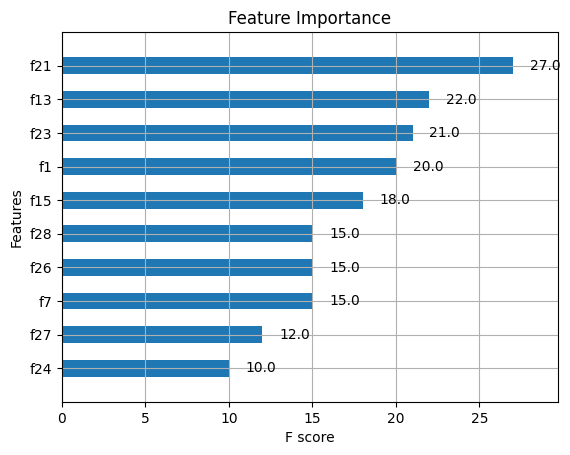

In [44]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False)
xgb_model.fit(X_train_scaled, y_train)

# Get and display feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, height=0.5, max_num_features=10, importance_type='weight', title='Feature Importance')
plt.show()

- f21 → 'radius_worst'
- f13 → 'area_se'
- f23 → 'area_worst'
- f1 → 'texture_mean'
- f15 → 'compactness_se'
- f28 → 'symmetry_worst'
- f26 → 'concavity_worst'
- f7 → 'concave_points_se'
- f27 → 'concave_points_worst'
- f24 → 'smoothness_worst'

In [45]:
# Most important features for training
important_features = [
    'radius_worst', 'area_se', 'texture_mean', 'compactness_se', 'symmetry_worst', 'concavity_worst',
    'concave points_se', 'concave points_worst', 'smoothness_worst'
]

# Filter the dataset to keep only the important features
X_important_features = df[important_features]

# Training and test sets
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_important_features, y, test_size=0.20, random_state=42)

# Data standardization
scaler_imp = StandardScaler()
X_train_imp_scaled = scaler_imp.fit_transform(X_train_imp)
X_test_imp_scaled = scaler_imp.transform(X_test_imp)

In [46]:
# The models
logistic_model_imp = LogisticRegression(random_state=42)
random_forest_model_imp = RandomForestClassifier(random_state=42)
svm_model_imp = SVC(random_state=42)
knn_model_imp = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='uniform')

# Training the models
logistic_model_imp.fit(X_train_imp_scaled, y_train_imp)
random_forest_model_imp.fit(X_train_imp_scaled, y_train_imp)
svm_model_imp.fit(X_train_imp_scaled, y_train_imp)
knn_model_imp.fit(X_train_imp_scaled, y_train_imp)

# Predictions and evaluation metrics
predictions_imp = {
    "Logistic Regression": logistic_model_imp.predict(X_test_imp_scaled),
    "Random Forest": random_forest_model_imp.predict(X_test_imp_scaled),
    "SVM": svm_model_imp.predict(X_test_imp_scaled),
    "k-NN": knn_model_imp.predict(X_test_imp_scaled)
}

metrics_imp = {}
for model_name, prediction in predictions_imp.items():
    metrics_imp[model_name] = {
        'Accuracy': accuracy_score(y_test_imp, prediction),
        'Precision': precision_score(y_test_imp, prediction),
        'Recall': recall_score(y_test_imp, prediction),
        'F1 Score': f1_score(y_test_imp, prediction)
    }
    
metrics_imp

{'Logistic Regression': {'Accuracy': 0.9912280701754386,
  'Precision': 1.0,
  'Recall': 0.9767441860465116,
  'F1 Score': 0.988235294117647},
 'Random Forest': {'Accuracy': 0.956140350877193,
  'Precision': 0.9523809523809523,
  'Recall': 0.9302325581395349,
  'F1 Score': 0.9411764705882352},
 'SVM': {'Accuracy': 0.9473684210526315,
  'Precision': 0.9302325581395349,
  'Recall': 0.9302325581395349,
  'F1 Score': 0.9302325581395349},
 'k-NN': {'Accuracy': 0.9385964912280702,
  'Precision': 0.9285714285714286,
  'Recall': 0.9069767441860465,
  'F1 Score': 0.9176470588235294}}

#### Summary of Accuracies for Various Models Tested with Only the Most Important Features

- **Regressione Logistica:**
    - **Accuracy**: 99.12%,
    - **Precision**: 100%,
    - **Recall**: 97.67%,
    - **F1 Score**: 98.82%.
- **RandomForestClassifier:** 
    - **Accuracy**: 95.61%,
    - **Precision**: 95.24%,
    - **Recall**: 93.02%,
    - **F1 Score**: 94.12%.
- **SVM (Support Vector Machine):**
    - **Accuracy**: 94.73%,
    - **Precision**: 93.02%,
    - **Recall**: 93.02%,
    - **F1 Score**: 93.02%.
- **KNN (K-Nearest Neighbors):** 
    - **Accuracy**: 93.86%,
    - **Precision**: 92.86%,
    - **Recall**: 90.70%,
    - **F1 Score**: 91.77%.

#### Comparison of Model Performances with All Features vs. Selected Features

- **Logistic Regression:**
    - Accuracy improved from 97.37% (all features) to 99.12% (selected features).
    - Precision remained nearly unchanged from 97.62% to 100%, and F1 Score increased from 96.47% to 98.82%.

- **Random Forest:**
    - A decrease in performance across all parameters: accuracy decreased from 96.49% to 95.61%, precision from 97.56% to 95.24%, and F1 Score from 95.24% to 94.12% when using only selected features.

- **SVM (Support Vector Machine):**
    - Accuracy decreased from 98.25% (all features) to 94.73% (selected features). However, precision decreased from 100% to 93.02%, and the F1 Score decreased from 97.62% to 93.02%.

- **KNN (K-Nearest Neighbors):**
    - Metrics slightly decreased: accuracy went from 94.74% (all features) to 93.86% (selected features), precision from 93.02% to 92.86%, and F1 Score from 93.02% to 91.77%.

In [47]:
# Save the model with the highest accuracy (SVM) to create an app using Gradio and Hugging Face

joblib.dump(logistic_model, 'app/breast_cancer_model.joblib')
joblib.dump(scaler, 'app/scaler.pkl')

['app/scaler.pkl']

**WEB APP**: https://huggingface.co/spaces/dianelysgallardosanabria/BreastCancerPredictions

## Conclusion and Insights
### Key Insights

- **Significant Correlations:** 

Larger tumors tend to be more compact, especially in malignant cases.

- **Effectiveness of Machine Learning Models:** 
    - **Logistic Regression:**
        - **Accuracy**: 97.37%,
        - **Precision**: 97.62%,
        - **Recall**: 95.35%,
        - **F1 Score**: 96.47%.
    - **RandomForestClassifier:** 
        - **Accuracy**: 96.49%,
        - **Precision**: 97.56%,
        - **Recall**: 93.02%,
        - **F1 Score**: 95.24%.
    - **SVM (Support Vector Machine):**
        - **Accuracy**: 98.25%,
        - **Precision**: 100%,
        - **Recall**: 95.35%,
        - **F1 Score**: 97.62%.
    - **KNN (K-Nearest Neighbors):** 
        - **Accuracy**: 94.74%,
        - **Precision**: 93.02%,
        - **Recall**: 93.02%,
        - **F1 Score**: 93.02%.

- **Importance of Features:** 
    - f21 → 'radius_worst'
    - f13 → 'area_se'
    - f23 → 'area_worst'
    - f1 → 'texture_mean'
    - f15 → 'compactness_se'
    - f28 → 'symmetry_worst'
    - f26 → 'concavity_worst'
    - f7 → 'concave_points_se'
    - f27 → 'concave_points_worst'
    - f24 → 'smoothness_worst'

### Conclusions
